# 1. Frame Extraction and Analysis

**Project:** Video EDA
**Goal:** Load a video file, understand its structure (tensor), and analyze frame-by-frame statistics.

---

## 1. Imports and Setup
We use `imageio` to easily load sample videos without external downloads.

In [1]:
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Load Video Data
We load a standard sample video: 'cockatoo.mp4'. This returns a 4D numpy array.

In [2]:
# Load sample video (auto-downloads if needed)
video_frames = iio.imread('imageio:cockatoo.mp4')

n_frames, height, width, channels = video_frames.shape
print(f"Video Shape: {video_frames.shape}")
print(f"  Frames: {n_frames}")
print(f"  Resolution: {width}x{height}")
print(f"  Channels: {channels}")

Video Shape: (280, 720, 1280, 3)
  Frames: 280
  Resolution: 1280x720
  Channels: 3


## 3. Visualize Frames
Let's look at a few frames spaced out over time.

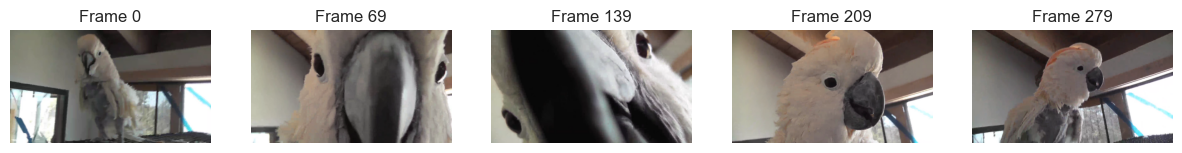

In [3]:
indices = np.linspace(0, n_frames - 1, 5, dtype=int)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(video_frames[idx])
    plt.title(f"Frame {idx}")
    plt.axis('off')
plt.show()

## 4. Temporal Statistics
How does the average brightness change over the course of the video? Sudden changes can indicate scene cuts or movement.

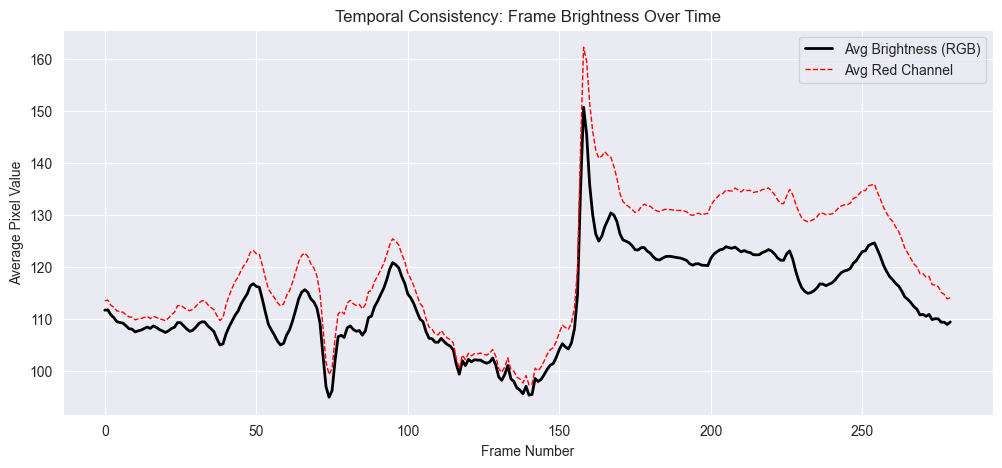

In [4]:
# Calculate mean brightness for each frame
frame_brightness = video_frames.mean(axis=(1, 2, 3))
frame_red_mean = video_frames[:, :, :, 0].mean(axis=(1, 2))

plt.figure(figsize=(12, 5))
plt.plot(frame_brightness, label='Avg Brightness (RGB)', lw=2, color='black')
plt.plot(frame_red_mean, label='Avg Red Channel', lw=1, color='red', linestyle='--')
plt.title('Temporal Consistency: Frame Brightness Over Time')
plt.xlabel('Frame Number')
plt.ylabel('Average Pixel Value')
plt.legend()
plt.show()

## 5. Pixel Histogram Analysis
Comparing the color distribution of the first frame vs the last frame.

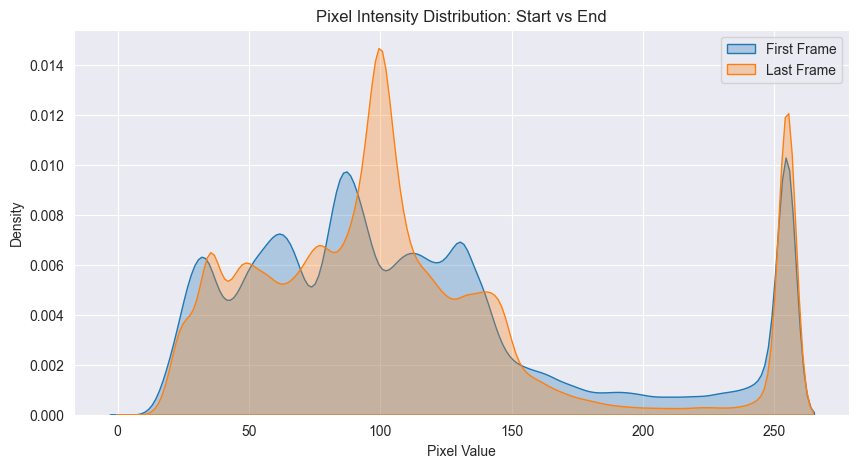

In [5]:
plt.figure(figsize=(10, 5))
sns.kdeplot(video_frames[0].ravel(), label='First Frame', fill=True, alpha=0.3)
sns.kdeplot(video_frames[-1].ravel(), label='Last Frame', fill=True, alpha=0.3)
plt.title('Pixel Intensity Distribution: Start vs End')
plt.xlabel('Pixel Value')
plt.legend()
plt.show()